# Feature Engineering

## Importing the Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm 

## Creating the DataFrames

In [2]:
df_train = pd.read_csv("gs://business-case/train.csv")
df_stores = pd.read_csv("gs://business-case/stores.csv")

#merge train dataset and stores dataset
df_train_stores = pd.merge(df_train, df_stores, on="store_nbr")

In [3]:
df_holidays = pd.read_csv("gs://business-case/holidays_events.csv")

In [22]:
df_train_stores.head(20)

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
1,2013,1,AUTOMOTIVE,1,2013-01-02,1782,2.0,0
2,2013,1,AUTOMOTIVE,1,2013-01-03,3564,3.0,0
3,2013,1,AUTOMOTIVE,1,2013-01-04,5346,3.0,0
4,2013,1,AUTOMOTIVE,1,2013-01-05,7128,5.0,0
5,2013,1,AUTOMOTIVE,1,2013-01-06,8910,2.0,0
6,2013,1,AUTOMOTIVE,1,2013-01-07,10692,0.0,0
7,2013,1,AUTOMOTIVE,1,2013-01-08,12474,2.0,0
8,2013,1,AUTOMOTIVE,1,2013-01-09,14256,2.0,0
9,2013,1,AUTOMOTIVE,1,2013-01-10,16038,2.0,0


In [5]:
df_train_stores.dtypes

id               int64
date            object
store_nbr        int64
family          object
sales          float64
onpromotion      int64
city            object
state           object
type            object
cluster          int64
dtype: object

### Analysing the dataset

In [6]:
df_train_stores.describe()

,id,store_nbr,sales,onpromotion,cluster
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01


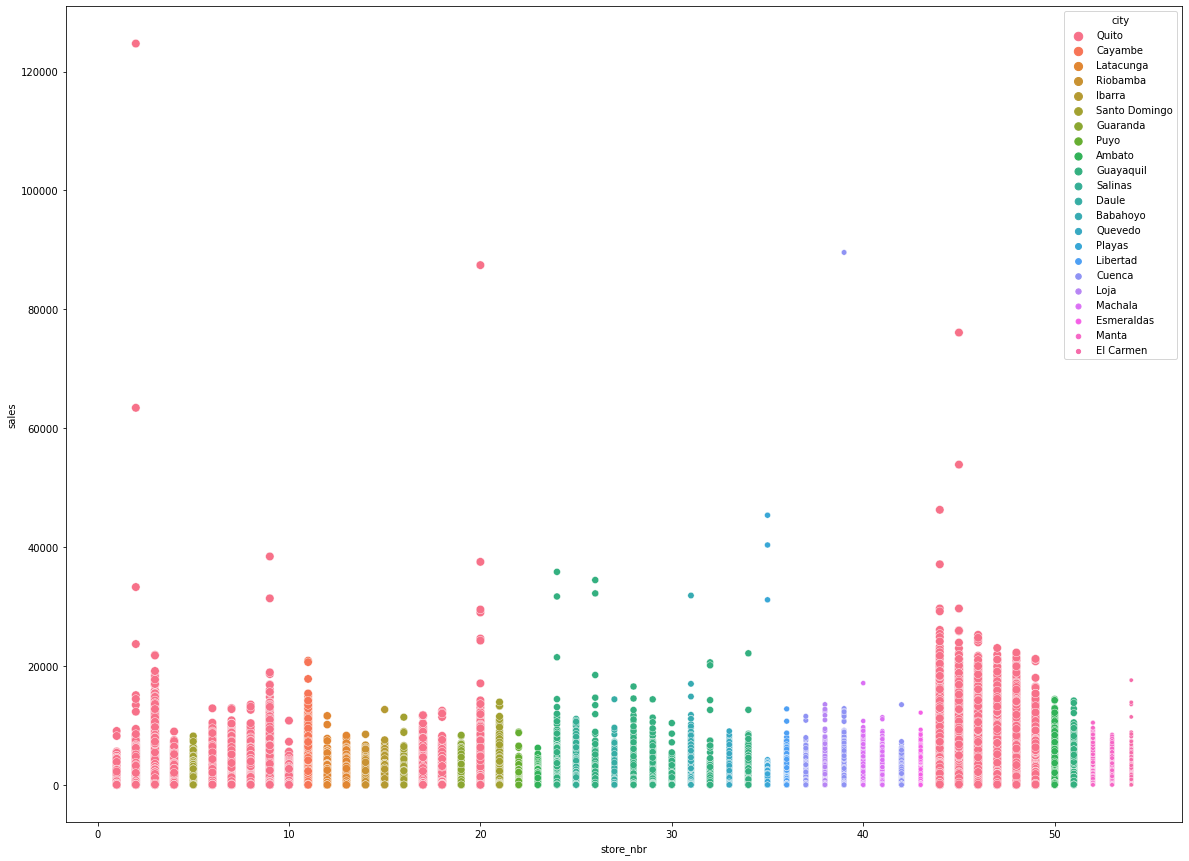

In [7]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='store_nbr', y='sales', data=df_train_stores, hue='city', size='city');

#### plotting the month x sales 

In [8]:
df_train_stores['date'] = pd.to_datetime(df_train_stores['date'])

In [9]:
df_train_stores['month'] = df_train_stores['date'].dt.month

In [10]:
df_train_stores['Year'] = df_train_stores['date'].dt.year

In [11]:
df_train_stores

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,month,Year
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,1,2013
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,1,2013
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,1,2013
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,1,2013
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,8,2017
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,8,2017
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,8,2017
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,8,2017


In [12]:
df_train_stores = df_train_stores.groupby(["Year","month","family","store_nbr", "date"]).sum().reset_index().drop(columns='cluster')

In [13]:
df_train_stores

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
1,2013,1,AUTOMOTIVE,1,2013-01-02,1782,2.0,0
2,2013,1,AUTOMOTIVE,1,2013-01-03,3564,3.0,0
3,2013,1,AUTOMOTIVE,1,2013-01-04,5346,3.0,0
4,2013,1,AUTOMOTIVE,1,2013-01-05,7128,5.0,0
...,...,...,...,...,...,...,...,...
3000883,2017,8,SEAFOOD,54,2017-08-11,2993627,0.0,0
3000884,2017,8,SEAFOOD,54,2017-08-12,2995409,1.0,1
3000885,2017,8,SEAFOOD,54,2017-08-13,2997191,2.0,0
3000886,2017,8,SEAFOOD,54,2017-08-14,2998973,0.0,0


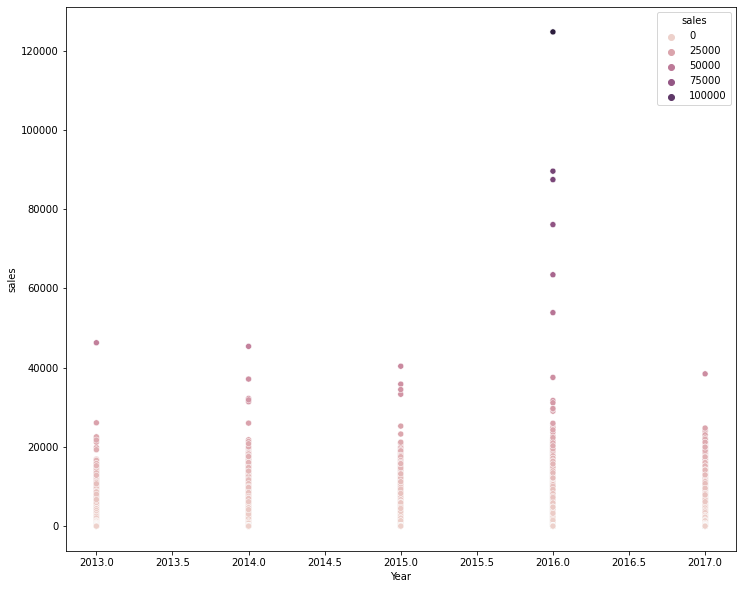

In [14]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Year', y='sales', data=df_train_stores, hue='sales');

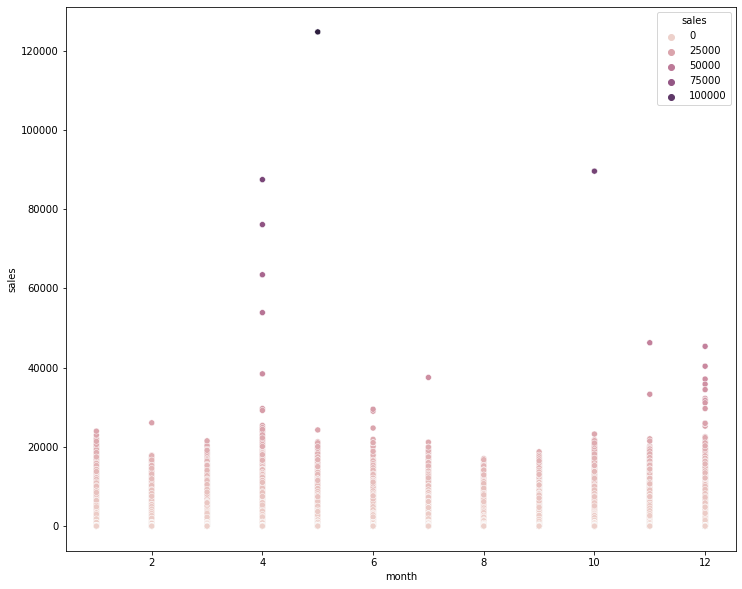

In [15]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='month', y='sales', data=df_train_stores, hue='sales');

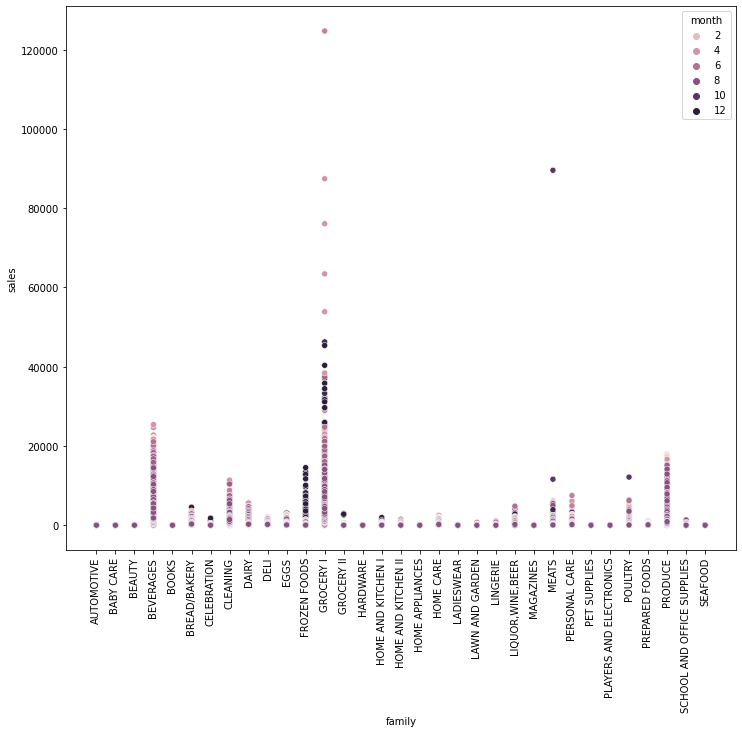

In [20]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='family', y='sales', data=df_train_stores, hue='month')
plt.xticks(rotation=90);

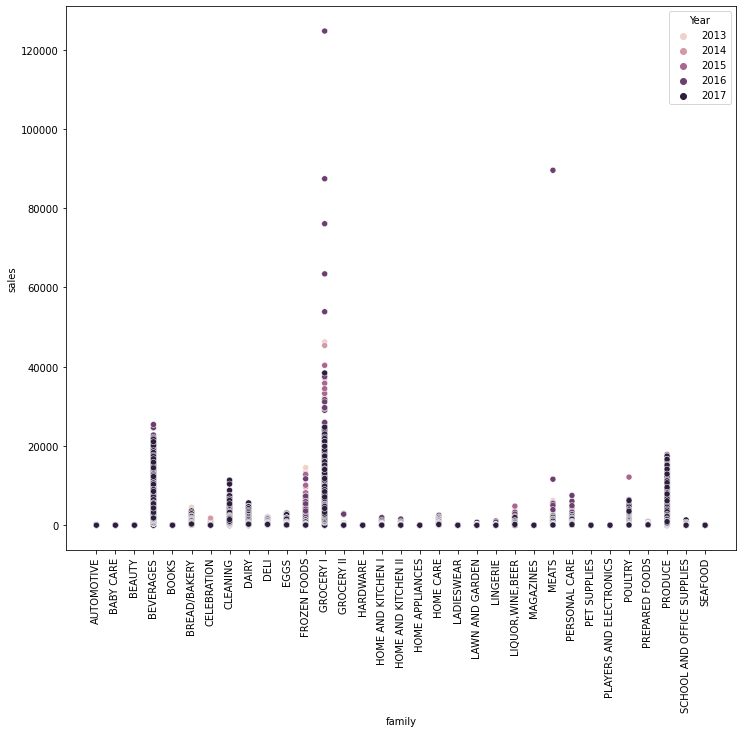

In [16]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='family', y='sales', data=df_train_stores, hue='Year')
plt.xticks(rotation=90);

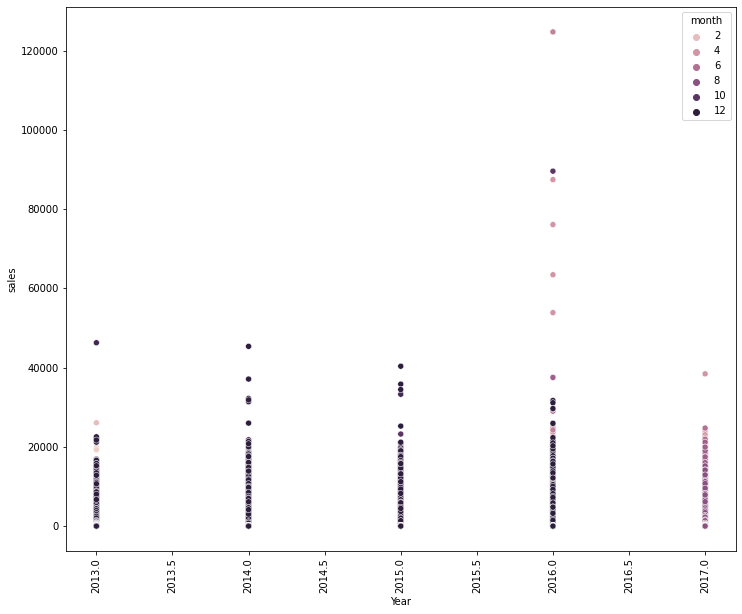

In [21]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Year', y='sales', data=df_train_stores, hue='month')
plt.xticks(rotation=90);

In [ ]:
plots mensais por ano

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/root/.pyenv/versions/3.8.12/envs/business_c

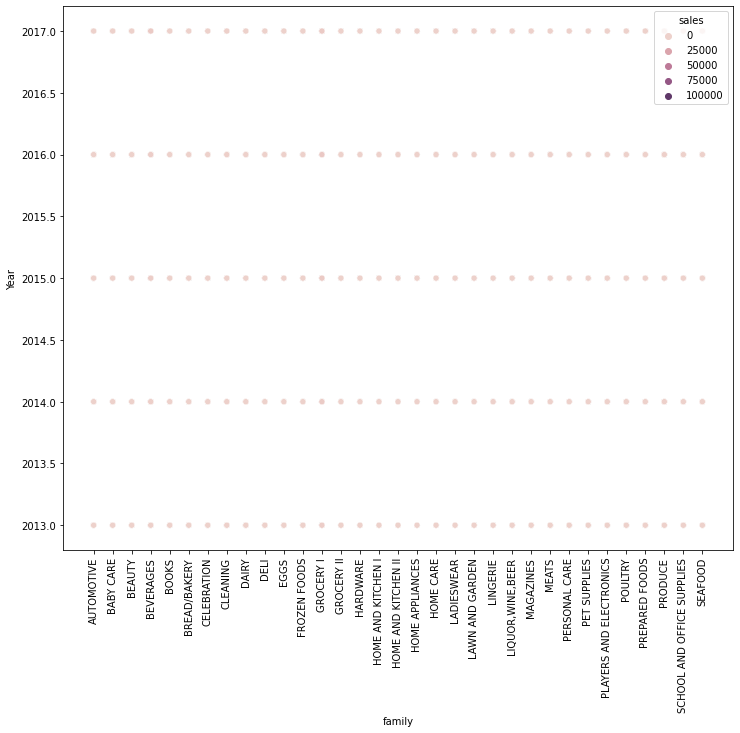

In [18]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='family', y='Year', data=df_train_stores, hue='sales')
plt.xticks(rotation=90);

In [ ]:
data_train_merge_stores_typeC = data_train_merge_stores[data_train_merge_stores["type"] == "C"]
data_train_merge_stores_typeC;

In [25]:
df_train_stores.nunique()

Year                 5
month               12
family              33
store_nbr           54
date              1684
id             3000888
sales           379610
onpromotion        362
dtype: int64

In [32]:
df_train_stores_2013 = df_train_stores[df_train_stores["Year"]== 2013]
df_train_stores_2013

,Year,month,family,store_nbr,date,id,sales,onpromotion
0,2013,1,AUTOMOTIVE,1,2013-01-01,0,0.0,0
1,2013,1,AUTOMOTIVE,1,2013-01-02,1782,2.0,0
2,2013,1,AUTOMOTIVE,1,2013-01-03,3564,3.0,0
3,2013,1,AUTOMOTIVE,1,2013-01-04,5346,3.0,0
4,2013,1,AUTOMOTIVE,1,2013-01-05,7128,5.0,0
...,...,...,...,...,...,...,...,...
648643,2013,12,SEAFOOD,54,2013-12-27,641387,3.0,0
648644,2013,12,SEAFOOD,54,2013-12-28,643169,0.0,0
648645,2013,12,SEAFOOD,54,2013-12-29,644951,2.0,0
648646,2013,12,SEAFOOD,54,2013-12-30,646733,1.0,0


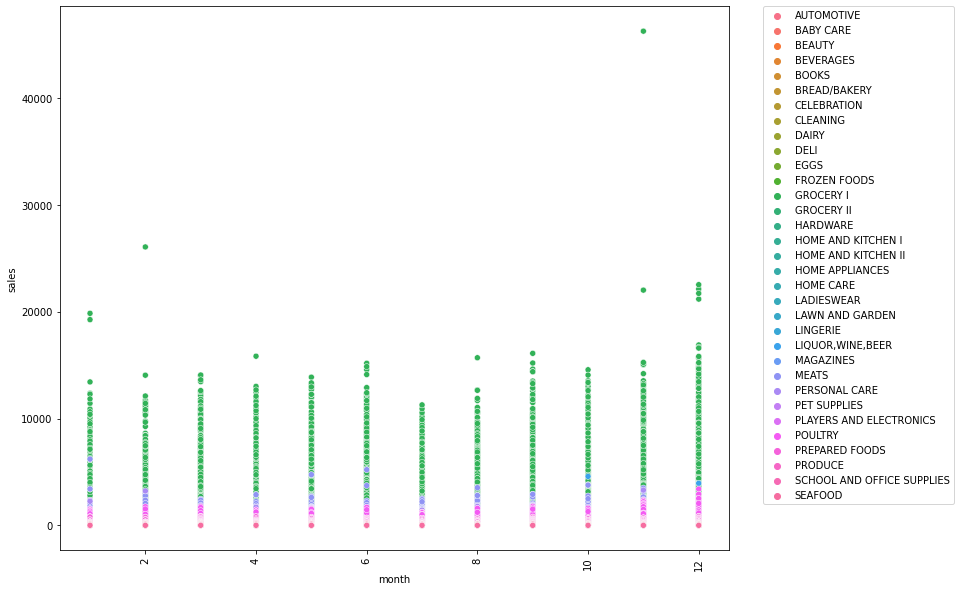

In [39]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='month', y='sales', data=df_train_stores_2013, hue='family')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

In [33]:
df_train_stores_2013.nunique

<bound method DataFrame.nunique of         Year  month      family  store_nbr       date      id  sales  \
0       2013      1  AUTOMOTIVE          1 2013-01-01       0    0.0   
1       2013      1  AUTOMOTIVE          1 2013-01-02    1782    2.0   
2       2013      1  AUTOMOTIVE          1 2013-01-03    3564    3.0   
3       2013      1  AUTOMOTIVE          1 2013-01-04    5346    3.0   
4       2013      1  AUTOMOTIVE          1 2013-01-05    7128    5.0   
...      ...    ...         ...        ...        ...     ...    ...   
648643  2013     12     SEAFOOD         54 2013-12-27  641387    3.0   
648644  2013     12     SEAFOOD         54 2013-12-28  643169    0.0   
648645  2013     12     SEAFOOD         54 2013-12-29  644951    2.0   
648646  2013     12     SEAFOOD         54 2013-12-30  646733    1.0   
648647  2013     12     SEAFOOD         54 2013-12-31  648515    0.0   

        onpromotion  
0                 0  
1                 0  
2                 0  
3           